# HW2: DFT (15 points)

For each markdown cell, add a cell (or cells) of code below. 
Reminders:
* This is an individual assignment. 
* If you use GenAI tools to assist you with your homework, remember to fill out the GenAI Usage Statement at the bottom of the notebook. Even if you use GenAI, you should not be directly copying the code.
* You may only use functions/packages we have discussed in class

## Part 1: Write complex sinusoidal function cSine (2 point)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

**1.** Implement a function for creating a complex sinusoid, cSine(k, N) below. This function will be used inside your subsequent DFT function. The amplitude of such a complex sinusoid is 1, the length is N, and the frequency in radians is 2pi\*k.

The input arguments to the function are two positive integers, k and N, such that k < N - 1. The function should return cSine, a numpy array of the complex sinusoid.

If you run your function using N=5 and k=1, the function should return the following numpy array cSine: array(\[1.0 + 0.j, 0.30901699 - 0.95105652j, -0.80901699 - 0.58778525j, -0.80901699 + 0.58778525j, 0.30901699 + 0.95105652j\])

**Note: A complex exponential function that will be used to test complex-valued INPUT would use $e^{1j}$. A complex  exponential function used to test *real* valued input should be negative ( $e^{-1j}$).* 

In [8]:
def cSine(k, N):
    """
    Inputs:
        k (integer) = frequency index of the complex sinusoid of the DFT
        N (integer) = length of complex sinusoid in samples
    Output:
        The function should return a numpy array
        cSine (numpy array) = The generated complex sinusoid (length N)
    """
    n = np.arange(N)                    
    cSine = np.exp(1j * 2 * np.pi * k * n / N)

    return cSine


## Graphing (1 point)

**2.** Plot the output of your complex sinusoid at A=1.0, 15Hz (i.e., periodicity over 15), and with a sampling rate of 100. Assume a time of one second and convert X-axis. Include a title and axes labels. 

Note: This is simply a time-series view of the signal and should include a real and imaginary component on the same graph.

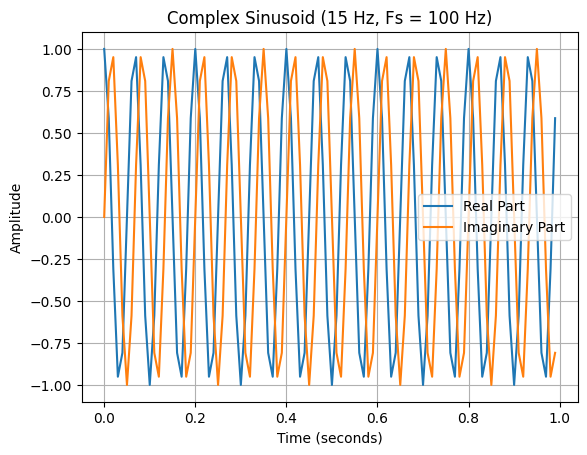

In [9]:

A = 1.0
f = 15         
Fs = 100       
T = 1           

t = np.arange(0, T, 1/Fs)

x = A * np.exp(1j * 2 * np.pi * f * t)

plt.figure()
plt.plot(t, np.real(x), label='Real Part')
plt.plot(t, np.imag(x), label='Imaginary Part')

plt.title("Complex Sinusoid (15 Hz, Fs = 100 Hz)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)

plt.show()


In [10]:
import numpy as np

def DFT(x):
    N = len(x)
    X = np.zeros(N) + 0j

    for k in range(N):
        n = np.arange(0, N)
        basis = np.cos(2*np.pi*k*n/N) - 1j*np.sin(2*np.pi*k*n/N)

        X[k] = sum(x * basis)

    return X


## Modify the DFT function (2 points)

**2.** Include a built-in graphing parameter that outputs the time-series of the original (real-valued) signal above a graph of the magnitude spectrum, and **modifies the graphical output so that the x-axis is appropriate for the magnitudes of real-valued signals.** (I.e., you should move the "negative" frequency components to the mirror image of the positive, centered around zero). (Do NOT use matplotlib's `magnitude_spectrum` plot function).

* **hint 1:**

`fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].plot()
ax[1].plot()`

* **hint 2:** To get the magnitude of the complex number, you take the absolute value (this is akin to getting the radius from the complex-valued plane using Pythagorean theorem.)*

* **hint 3:** Your function should print a plot but not **return** a plot object.* It should return the array containing the X coefficients for each k.

In [11]:
#modify the same algorithm above to include graphics as output
def myDFT2(x):

    import numpy as np
    import matplotlib.pyplot as plt

    N = len(x)

    X = np.zeros(N) + 0j

    for k in range(N):
        n = np.arange(0, N)
        basis = np.cos(2*np.pi*k*n/N) - 1j*np.sin(2*np.pi*k*n/N)
        X[k] = sum(x * basis)

    mag = np.abs(X)

    X_shift = np.fft.fftshift(mag)

    freq = np.arange(-N//2, N//2)

    fig, ax = plt.subplots(nrows=2, ncols=1)

    ax[0].plot(x)
    ax[0].set_title("Time-Domain Signal")
    ax[0].set_xlabel("Sample")
    ax[0].set_ylabel("Amplitude")

    ax[1].plot(freq, X_shift)
    ax[1].set_title("Magnitude Spectrum (Centered)")
    ax[1].set_xlabel("Frequency Bin")
    ax[1].set_ylabel("|X[k]|")

    plt.tight_layout()
    plt.show()

    return X
   

## Using the DFT (1 point)

Pass each of these three signals to your second DFT function and answer the question below.

(a & b) Two different signals with k = integer value, and k = non-integer value (e.g., 7 and 7.5)

(c) A 1s saw wave created with **your own saw function** from Project 1, using a sampling rate of no more than 3000 (set frequency to 50Hz).

**In signals a and b, why does a non-integer k value (e.g., 7.5) produce energy across multiple frequency bins?**

In [ ]:
## Because of spectal leakage

## Part 3: Implement the inverse discrete Fourier (4 points)
Using `Lesson14_DFT_review` as a guide, try to implement the following. Remember that the complex exponential needs to be the inverse of the DFT so there is a +1j instead of -1j in the equation:

$$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{j 2\pi k n/N} , n = 0,...,N-1$$

**1.** Complete the function IDFT(X) so that it implements the inverse discrete Fourier transform (IDFT). Given a frequency spectrum X of length N, the function should return its IDFT x, also of length N. Assume that the frequency index of the input spectrum ranges from 0 to N - 1.

The input argument to the function is a numpy array X of the frequency spectrum and the function should return a numpy array x, the IDFT of X. Remember to scale the output appropriately.

If you run your function using X = np.array([1 ,1 ,1 ,1]), the function should return the following numpy array x: array([ 1.0 +0.0 j, -4.5924255e-17 +5.5511151e-17j, 0.000000e+00 +6.12323400e-17j, 8.22616137e-17 +8.32667268e-17j]).

Notice that the output numpy array is essentially [1, 0, 0, 0]. Again, instead of exact 0 we get very small numerical values of the order of 10−15
, which can be ignored. Also, these small numerical errors are machine dependent and might be different in your case. 

*Note: at the end your function will return complex values. You will likely want to return only the real-valued signal. You can usually safely discard the imaginary part. the `np.real` function will do this for you.*

In [ ]:
def IDFT(X):
    """
    Input:
    X (numpy array) = frequency spectrum (length N)
    Output:
    The function should return a numpy array of length N
    x (numpy array) = The IDFT of the frequency spectrum X
    (length N)
    """
  
    N = len(X)
    x = np.zeros(N) + 0j 
    for n in range(N):
        k = np.arange(0, N)
        basis = np.cos(2*np.pi*k*n/N) + 1j*np.sin(2*np.pi*k*n/N) 
        x[n] = (1/N) * sum(X * basis)

    return np.real(x)

**2.** A test of the IDFT function can be done by passing your DFT function (with parameters) as direct nested input to the IDFT. 

Show the output of nesting your original DFT function inside your IDFT function using the following input: A complex waveform created by your custom sawtooth function with 5 harmonics. See if you get back the original time domain sequence. Ensure we see graphical reprsentation of the original time-series input as well as the time-series output of the IDFT.

**Note: remember to use small Ns here!**
* Note: any input should still satisfy the following: (a) small overall number of samples, (b) stationary tone.

We have not explicitly talked about testing yet, but a good way to compare the original and reconstructed signal is by computing an absolute difference or usng np.allclose() (rather than just eyeballing it).

In [ ]:

N = 64
n = np.arange(N)

test_sig = np.zeros(N) + 0j

for h in range(1,6):      
    test_sig += (1/h) * np.exp(1j*2*np.pi*h*n/N)

reconstructed = IDFT(myDFT(test_sig))

In [ ]:
print("Signals match:", np.allclose(test_sig, reconstructed, atol=1e-10))

error = np.max(np.abs(test_sig - reconstructed))
print("Max reconstruction error:", error)

In [ ]:
fig, ax = plt.subplots(2,1)

# original signal
ax[0].plot(np.real(test_sig), label="Original Real")
ax[0].plot(np.imag(test_sig), label="Original Imag")
ax[0].set_title("Original Time Series")
ax[0].legend()

# reconstructed signal
ax[1].plot(np.real(reconstructed), label="Reconstructed Real")
ax[1].plot(np.imag(reconstructed), label="Reconstructed Imag")
ax[1].set_title("IDFT(DFT(x)) Reconstruction")
ax[1].legend()

plt.tight_layout()
plt.show()

GenAI Usage Statement:

- Tool used and date of access
- The input (prompt) you provided
- A copy of the output
- A description of how you used or edited the AI-generated content